# Image Processing

#### The Task was to create a Disparity Map using Stereo Images and then calculate the Root Mean Square Error Between the
- #### a) Original Left and Right Images (Without using disparity correction)
- #### b) Left and Right Images (After applying disparity correction)

The dataset used is available on this link http://vision.middlebury.edu/stereo/submit3/. 

# Algorithm used

## Basic Block matching Algorithm 

1. A template on right image is taken
2. A corresponding block on the left image is taken
3. The loss function is applied like Sum of Absolute Distance
4. The block is moved one place on the left image and the loss is calculated again
5. The process is repeated till the block reaches the end of window
6. Then the least disparity (shift) with least loss is saved

### Importing Libraries

In [1]:
import cv2
# For loading of images and converting the images into arrays

import matplotlib.pyplot as plt
# For plotting the images so that it can be visualized

import numpy as np
# For implementing matrix operations and application of algorithm

### Visualizing the image

In [2]:
plt.rcParams['figure.figsize'] = (16, 9)
# Sets the default plotting size of images

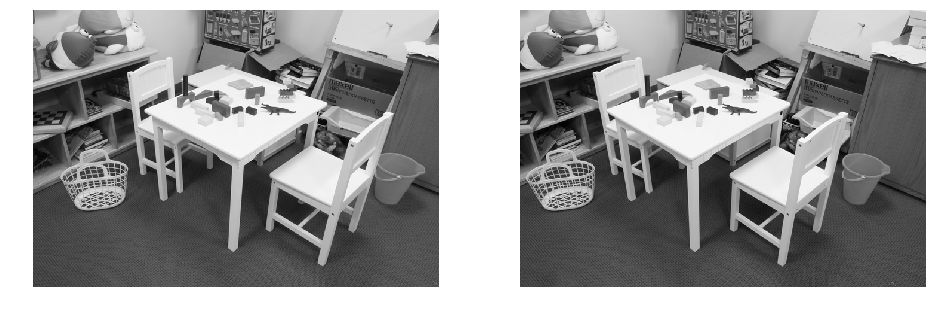

In [3]:
img_left = cv2.imread('./MiddEval3/trainingQ/Playtable/im0.png')
# Reads and loads the left image

img_right = cv2.imread('./MiddEval3/trainingQ/Playtable/im1.png')
# Reads and loads the right image

img_left = cv2.cvtColor(img_left, cv2.COLOR_BGR2GRAY)
img_right = cv2.cvtColor(img_right, cv2.COLOR_BGR2GRAY)
# Converts the color channel into grayscale so that it is easier to work with

plt.subplot(121) 
plt.axis('off')
plt.imshow(img_left, cmap='gray')

plt.subplot(122)
plt.axis('off')
plt.imshow(img_right, cmap='gray')
# Plots the images so that it can be viewed 

### Initializing Variables used

In [4]:
# Image array returned by cv2 is a 8-bit integer array
# we convert it to 32-bit integer array to perform mathematical operation

img_array_left = np.asarray(img_left, dtype="int32" )
img_array_right = np.asarray(img_right, dtype="int32")

In [5]:
# Initiating the disparity map
# The size of disparity map is equal to the size of the images
# Currently the disparity of all pixels is set to zero which will be updated later

disparity_map = np.zeros(img_array_left.shape)

### Custom Loss Functions

In [6]:
def sum_squared_distance(a,b):
    return np.square(a-b).sum()


def sum_absolute_distance(a,b):
    return np.abs(a-b).sum()

# FIRST TEST
# BLOCK SIZE 5 - WINDOW SIZE 50

In [7]:
block_size = 5
# Defines the Block Size

window_size = 50
# Defines the sliding window size

IMG_ROWS = img_array_left.shape[0]
IMG_COLS = img_array_left.shape[1]
# Getting the shape of image for loop

In [8]:
for i in range(IMG_ROWS-block_size+1):
# Iterating through all the rows
    
    for j in range(IMG_COLS-block_size+1):
    # Iterating through all the columns 
        
        disparity = []
        # placeholder array for storing all the disparity values
        
        right = img_array_right[i:i+block_size,j:j+block_size]
        # Current Window on the right image, the next loop will search this template in the left image
        
        for k in range(window_size):
        # The loop for iterating the template through the window
        
            if(j+k+block_size<IMG_COLS):
            # This if statement checks if the current block in the window has reached the end of the image
            # if the end is reached the block always returns the last value    
                left = img_array_left[i:i+block_size,j+k:j+block_size+k]
            else: 
                left = img_array_left[i:i+block_size,-block_size:]
            
            # The disparity is calculated using the custom  loss function
            current_disparity = sum_absolute_distance(left,right)
            
            # The disparity is stored in the placeholder 
            disparity.append(current_disparity)
            
        np.array(disparity)
        
        # The disparity for the highest matching block and template is stored in the disparity map
        disparity_map[i][j]=np.argmin(disparity)

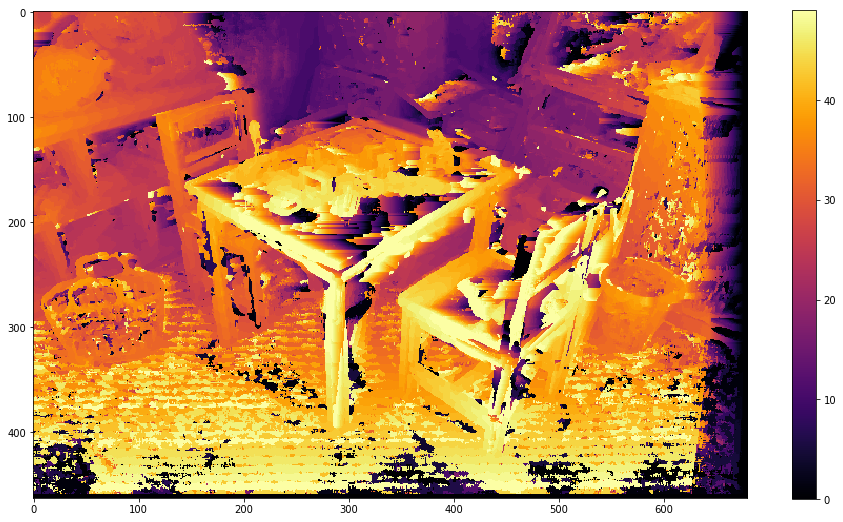

In [9]:
# The disparity map is visualized
# Blue shows the area that is further behind
# Yellow shows the area nearer to the camera

plt.imshow(disparity_map, cmap='inferno')
plt.colorbar()

## RMSE

In [10]:
# INITIAL RMSE (NON OPTIMIZED)

np.sqrt(np.square(img_array_left - img_array_right).sum())/img_array_left.size

0.11029290775118919

In [11]:
adjusted = np.zeros(img_array_left.shape)

In [12]:
for i in range(img_array_left.shape[0]):
    for j in range(img_array_left.shape[1]):
        k = int(disparity_map[i][j])
        adjusted[i][j] = img_array_left[i][j+k]

In [13]:
# RMSE AFTER DISPARITY CALCULATION

np.sqrt(np.square(img_array_right - adjusted).sum())/img_array_left.size

0.027119088455812058

# BLOCK SIZE 7 - WINDOW SIZE 50

In [14]:
block_size = 7
# Defines the Block Size

window_size = 50
# Defines the sliding window size

IMG_ROWS = img_array_left.shape[0]
IMG_COLS = img_array_left.shape[1]
# Getting the shape of image for loop

In [15]:
for i in range(IMG_ROWS-block_size+1):
# Iterating through all the rows
    
    for j in range(IMG_COLS-block_size+1):
    # Iterating through all the columns 
        
        disparity = []
        # placeholder array for storing all the disparity values
        
        right = img_array_right[i:i+block_size,j:j+block_size]
        # Current Window on the right image, the next loop will search this template in the left image
        
        for k in range(window_size):
        # The loop for iterating the template through the window
        
            if(j+k+block_size<IMG_COLS):
            # This if statement checks if the current block in the window has reached the end of the image
            # if the end is reached the block always returns the last value    
                left = img_array_left[i:i+block_size,j+k:j+block_size+k]
            else: 
                left = img_array_left[i:i+block_size,-block_size:]
            
            # The disparity is calculated using the custom  loss function
            current_disparity = sum_absolute_distance(left,right)
            
            # The disparity is stored in the placeholder 
            disparity.append(current_disparity)
            
        np.array(disparity)
        
        # The disparity for the highest matching block and template is stored in the disparity map
        disparity_map[i][j]=np.argmin(disparity)

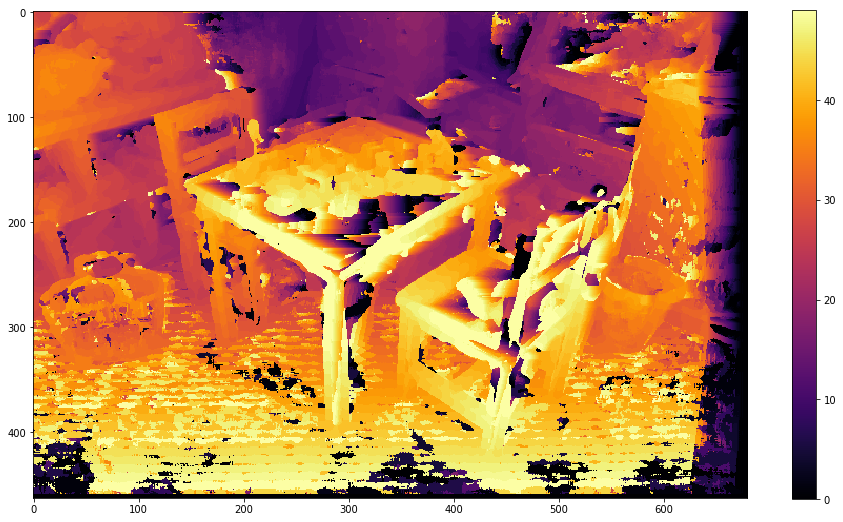

In [16]:
# The disparity map is visualized
# Blue shows the area that is further behind
# Yellow shows the area nearer to the camera

plt.imshow(disparity_map, cmap='inferno')
plt.colorbar()

### RMSE


In [17]:
# INITIAL RMSE (NON OPTIMIZED)

np.sqrt(np.square(img_array_left - img_array_right).sum())/img_array_left.size

0.11029290775118919

In [18]:
adjusted = np.zeros(img_array_left.shape)

In [19]:
for i in range(img_array_left.shape[0]):
    for j in range(img_array_left.shape[1]):
        k = int(disparity_map[i][j])
        adjusted[i][j] = img_array_left[i][j+k]

In [20]:
# RMSE AFTER DISPARITY CALCULATION

np.sqrt(np.square(img_array_right - adjusted).sum())/img_array_left.size

0.031537823524842405

# BLOCK SIZE 10 - WINDOW SIZE 100

In [21]:
block_size = 10
# Defines the Block Size

window_size = 100
# Defines the sliding window size

IMG_ROWS = img_array_left.shape[0]
IMG_COLS = img_array_left.shape[1]
# Getting the shape of image for loop

In [22]:
for i in range(IMG_ROWS-block_size+1):
# Iterating through all the rows
    
    for j in range(IMG_COLS-block_size+1):
    # Iterating through all the columns 
        
        disparity = []
        # placeholder array for storing all the disparity values
        
        right = img_array_right[i:i+block_size,j:j+block_size]
        # Current Window on the right image, the next loop will search this template in the left image
        
        for k in range(window_size):
        # The loop for iterating the template through the window
        
            if(j+k+block_size<IMG_COLS):
            # This if statement checks if the current block in the window has reached the end of the image
            # if the end is reached the block always returns the last value    
                left = img_array_left[i:i+block_size,j+k:j+block_size+k]
            else: 
                left = img_array_left[i:i+block_size,-block_size:]
            
            # The disparity is calculated using the custom  loss function
            current_disparity = sum_absolute_distance(left,right)
            
            # The disparity is stored in the placeholder 
            disparity.append(current_disparity)
            
        np.array(disparity)
        
        # The disparity for the highest matching block and template is stored in the disparity map
        disparity_map[i][j]=np.argmin(disparity)

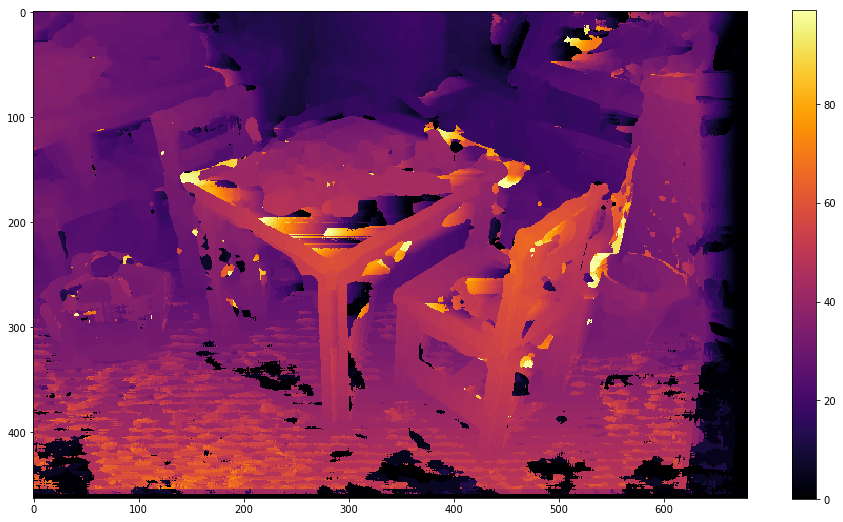

In [23]:
# The disparity map is visualized
# Blue shows the area that is further behind
# Yellow shows the area nearer to the camera

plt.imshow(disparity_map, cmap='inferno')
plt.colorbar()

### RMSE

In [24]:
# INITIAL RMSE (NON OPTIMIZED)

np.sqrt(np.square(img_array_left - img_array_right).sum())/img_array_left.size

0.11029290775118919

In [25]:
adjusted = np.zeros(img_array_left.shape)

In [26]:
for i in range(img_array_left.shape[0]):
    for j in range(img_array_left.shape[1]):
        k = int(disparity_map[i][j])
        adjusted[i][j] = img_array_left[i][j+k]

In [27]:
# RMSE AFTER DISPARITY CALCULATION

np.sqrt(np.square(img_array_right - adjusted).sum())/img_array_left.size

0.03229583893890963

# RESULTS

## For Block size 5 - Window size 50

- Non-Optimized RMSE = 0.11029290775118919
- Optimized RMSE = 0.027119088455812058


## For Block size 7 - Window size 50

- Non-Optimized RMSE = 0.11029290775118919
- Optimized RMSE = 0.031537823524842405


## For Block size 10 - Window size 100

- Non-Optimized RMSE = 0.11029290775118919
- Optimized RMSE = 0.03875514438538535

([<matplotlib.axis.YTick at 0x7fe6e8444d68>,
 <a list of 4 Text yticklabel objects>)

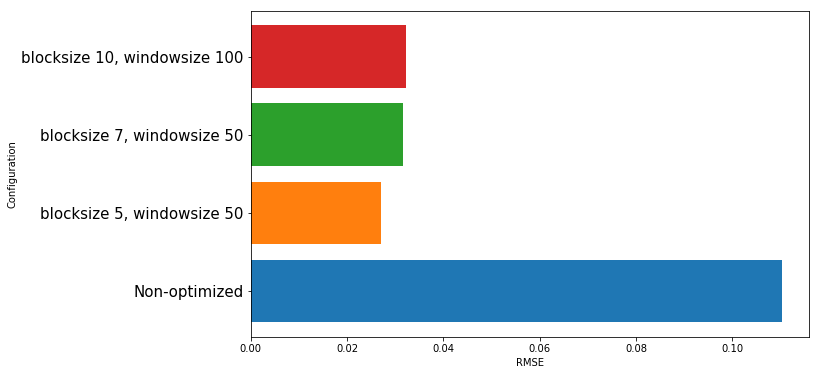

In [29]:
plt.rcParams['figure.figsize'] = (10, 6)

plt.ylabel("Configuration")
plt.xlabel("RMSE")

plt.barh(0,0.11029290775118919)
plt.barh(1,0.027119088455812058)
plt.barh(2,0.031537823524842405)
plt.barh(3,0.03229583893890963)

plt.yticks([0,1,2,3], ["Non-optimized", "blocksize 5, windowsize 50", "blocksize 7, windowsize 50", "blocksize 10, windowsize 100"], fontsize=15)